# CREB1: upbm analysis

In [1]:
library(tidyverse)
library(cowplot)
library(ggrepel)
library(readxl)
library(upbm)
library(upbmAux)
theme_set(theme_bw())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuan

In [2]:
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r * 10)
}

In [30]:
# writing the design files for GEO submission
write.table(pbm_8x60k_v1@design, file=file.path("../../../data/internal/pbms/gpr_geo/pbm_8x60k_v1.txt"), 
            row.names=FALSE,
            quote=FALSE, sep="\t")
write.table(broom::tidy(refcy3_8x60k_v1), file=file.path("../../../data/internal/pbms/gpr_geo/refcy3_8x60k_v1.txt"), 
            row.names=FALSE,
            quote=FALSE, sep="\t")

head(refcy3_8x60k_v1)

class: PBMExperiment 
dim: 6 4 
metadata(2): sfactor params
assays(1): ref
rownames: NULL
rowData names(4): Column Row probeID Sequence
colnames(4): probe_median probe_mean probe_mad probe_sd
colData names(0):
probeCols(4): Column Row probeID Sequence
probeFilter names(1): probeID
probeTrim: 1 36

## variables

In [3]:
tf <- "CREB1"

motif <- "CGTCA"
rc_motif <- "TGACG"

ref_condition <- "CREB1-ref"

datdir <- "../../../data/internal/pbms/gpr_geo"
sampdir <- "../../../data/internal/pbms/gpr_geo"

## 1. load sample sheet

In [4]:
alexa_samples <- read_csv(file.path(sampdir, paste0(tf, "-alexa.csv")), col_types = cols())
alexa_samples

New names:
• `` -> `...1`


...1,date,id,reuse,type,pmt,lp,idx,condition,gpr,id_idx
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,230411,447,1,Alexa,500,100,1,CREB1-alt,230411_v14_447_1_CREB1-alt_Alexa488_lp500pg100_1-8.gpr,447_1
1,230411,447,1,Alexa,500,100,4,CREB1-ref,230411_v14_447_1_CREB1-ref_Alexa488_lp500pg100_4-8.gpr,447_4
2,230413,448,1,Alexa,500,100,6,CREB1-alt,230413_v14_448_1_CREB1-alt_Alexa488_lp500pg100_6-8.gpr,448_6
3,230413,448,1,Alexa,500,100,7,CREB1-ref,230413_v14_448_1_CREB1-ref_Alexa488_lp500pg100_7-8.gpr,448_7
4,230511,459,1,Alexa,500,100,2,CREB1-alt,230511_v14_459_1_CREB1-alt_Alexa488_lp500pg100_2-8.gpr,459_2
5,230511,459,1,Alexa,500,100,8,CREB1-ref,230511_v14_459_1_CREB1-ref_Alexa488_lp500pg100_8-8.gpr,459_8
6,230519,452,1,Alexa,500,100,6,CREB1-ref,230519_v14_452_1_CREB1-ref_Alexa488_lp500pg100_6-8.gpr,452_6
7,230601,455,1,Alexa,500,100,6,CREB1-alt,230601_v14_455_1_CREB1-alt_Alexa488_lp500pg100_6-8.gpr,455_6
8,230601,455,1,Alexa,500,100,7,CREB1-ref,230601_v14_455_1_CREB1-ref_Alexa488_lp500pg100_7-8.gpr,455_7


In [5]:
cy3_samples <- read_csv(file.path(sampdir, paste0(tf, "-cy3.csv")), col_types = cols())
cy3_samples

New names:
• `` -> `...1`


...1,date,id,type,pmt,lp,idx,gpr,id_idx
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,230410,447,Alexa,500,100,1,230410_v14_447_doublestranded_Cy3_lp500pg100_1-8.gpr,447_1
1,230410,447,Alexa,500,100,4,230410_v14_447_doublestranded_Cy3_lp500pg100_4-8.gpr,447_4
2,230412,448,Alexa,500,100,6,230412_v14_448_doublestranded_Cy3_lp500pg100_6-8.gpr,448_6
3,230412,448,Alexa,500,100,7,230412_v14_448_doublestranded_Cy3_lp500pg100_7-8.gpr,448_7
4,230511,459,Alexa,500,100,2,230510_v14_459_doublestranded_Cy3_lp500pg100_2-8.gpr,459_2
5,230511,459,Alexa,500,100,8,230510_v14_459_doublestranded_Cy3_lp500pg100_8-8.gpr,459_8
6,230517,452,Alexa,500,100,6,230517_v14_452_doublestranded_Cy3_lp500pg100_6-8.gpr,452_6
7,230531,455,Alexa,500,100,6,230531_v14_455_doublestranded_Cy3_lp500pg100_6-8.gpr,455_6
8,230531,455,Alexa,500,100,7,230531_v14_455_doublestranded_Cy3_lp500pg100_6-8.gpr,455_7


In [6]:
# properly prefix file paths for data
alexa_samples <- dplyr::mutate(alexa_samples, gpr = file.path(datdir, gpr))
cy3_samples <- dplyr::mutate(cy3_samples, gpr = file.path(datdir, gpr))

## 2. load data

In [7]:
tf_a <- gpr2PBMExperiment(alexa_samples, probes = pbm_8x60k_v1)
tf_c <- gpr2PBMExperiment(cy3_samples, probes = pbm_8x60k_v1)

## 3. QC: # saturated and NA probes

In [8]:
tf_a_df <- broom::tidy(tf_a, long = TRUE) 
tf_c_df <- broom::tidy(tf_c, long = TRUE) 

In [9]:
tf_a_df %>%
    dplyr::group_by(id, condition, pmt) %>%
    dplyr::summarize(nsat = sum(log2(fore) > 15.5 |
                                log2(fore) < 4, na.rm = TRUE)) %>%
    dplyr::ungroup() %>%
    tidyr::spread(pmt, nsat) %>%
    print(n = 50)

`summarise()` has grouped output by 'id', 'condition'. You can override using
the `.groups` argument.


# A tibble: 9 × 3
     id condition `500`
  <dbl> <chr>     <int>
1   447 CREB1-alt     3
2   447 CREB1-ref     3
3   448 CREB1-alt     3
4   448 CREB1-ref     3
5   452 CREB1-ref     3
6   455 CREB1-alt     4
7   455 CREB1-ref     4
8   459 CREB1-alt     0
9   459 CREB1-ref     4


In [10]:
tf_a_df %>%
    dplyr::group_by(id, condition, pmt) %>%
    dplyr::summarize(nna = sum(is.na(fore))) %>%
    dplyr::ungroup() %>%
    tidyr::spread(pmt, nna) %>%
    print(n = 50)

`summarise()` has grouped output by 'id', 'condition'. You can override using
the `.groups` argument.


# A tibble: 9 × 3
     id condition `500`
  <dbl> <chr>     <int>
1   447 CREB1-alt     0
2   447 CREB1-ref     0
3   448 CREB1-alt     0
4   448 CREB1-ref     0
5   452 CREB1-ref     0
6   455 CREB1-alt     0
7   455 CREB1-ref     0
8   459 CREB1-alt     0
9   459 CREB1-ref     0


## 4. pre-processing

In [11]:
chosen_pmt <- 500

In [12]:
tf_a_pmt <- tf_a[, colData(tf_a)$pmt == chosen_pmt]

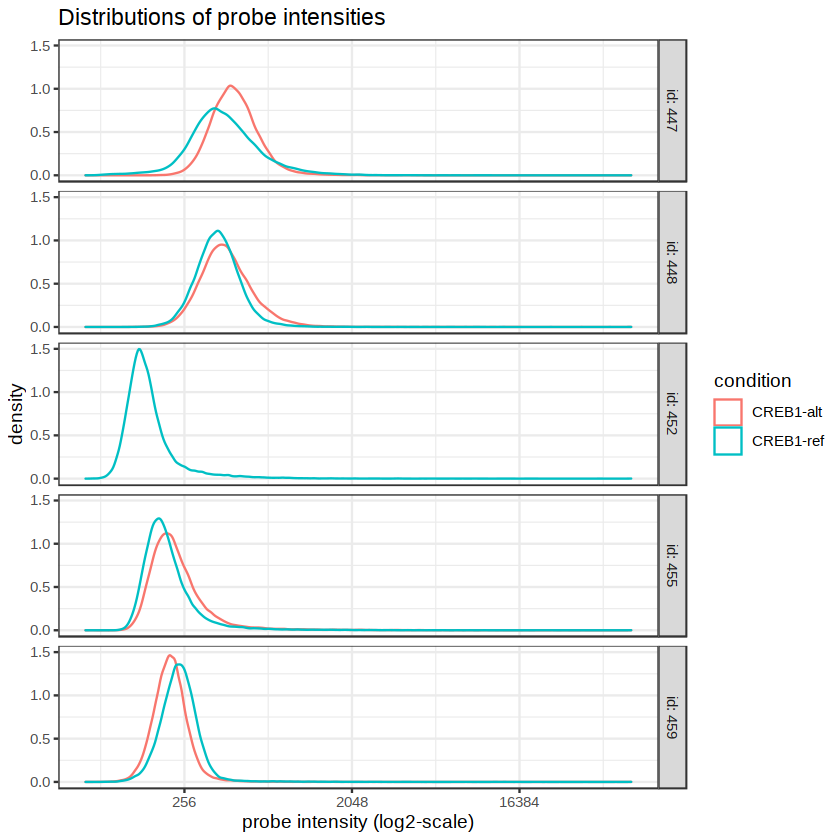

In [13]:
tf_a2 <- broom::tidy(tf_a_pmt, "fore", long = TRUE)

ggplot(tf_a2, aes(x = fore, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("probe intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of probe intensities")

## background-subtract probe intensities

In [14]:
tf_a_pmt <- backgroundSubtract(tf_a_pmt, assay = "fore", assayb = "back")
tf_c <- backgroundSubtract(tf_c, assay = "fore", assayb = "back")

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 46 rows containing non-finite values (stat_density).”


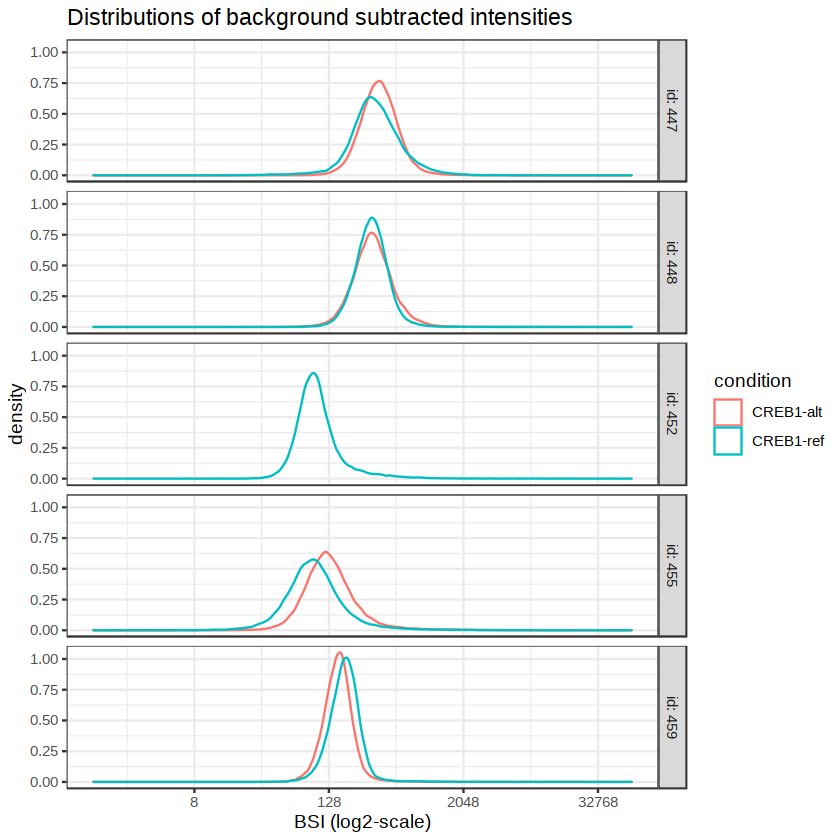

In [15]:
tf_a2 <- broom::tidy(tf_a_pmt, "fore", long = TRUE)

ggplot(tf_a2, aes(x = fore, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("BSI (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of background subtracted intensities")

## cy3 normalize

In [16]:
tf_c_e <- cy3FitEmpirical(tf_c, refcy3_8x60k_v1)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

In [17]:
tf_a_pmt <- cy3Normalize(pe = tf_a_pmt, cy3pe = tf_c_e, match_by = "id_idx")

## spatial adjustment

In [18]:
tf_a_pmt <- spatiallyAdjust(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

## normalize within replicates

In [19]:
tf_a_pmt <- normalizeWithinReplicates(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 8524 rows containing non-finite values (stat_density).”


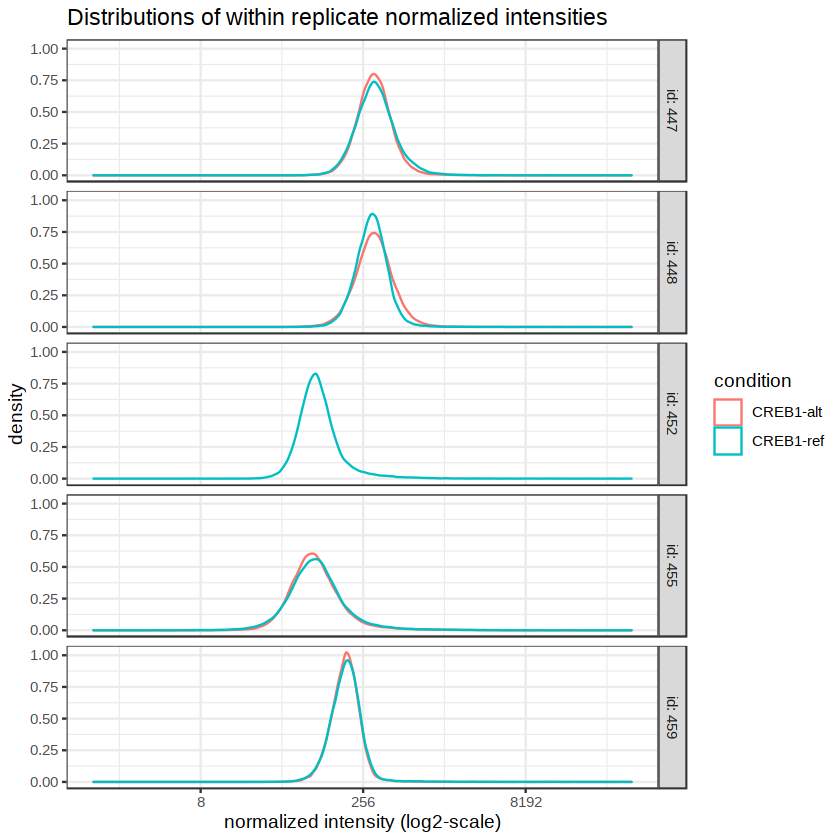

In [20]:
broom::tidy(tf_a_pmt, long = TRUE) %>%
    ggplot(aes(x = normalized, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("normalized intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of within replicate normalized intensities")

## normalize across repliates

In [21]:
tf_a_pmt <- normalizeAcrossReplicates(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 8524 rows containing non-finite values (stat_density).”


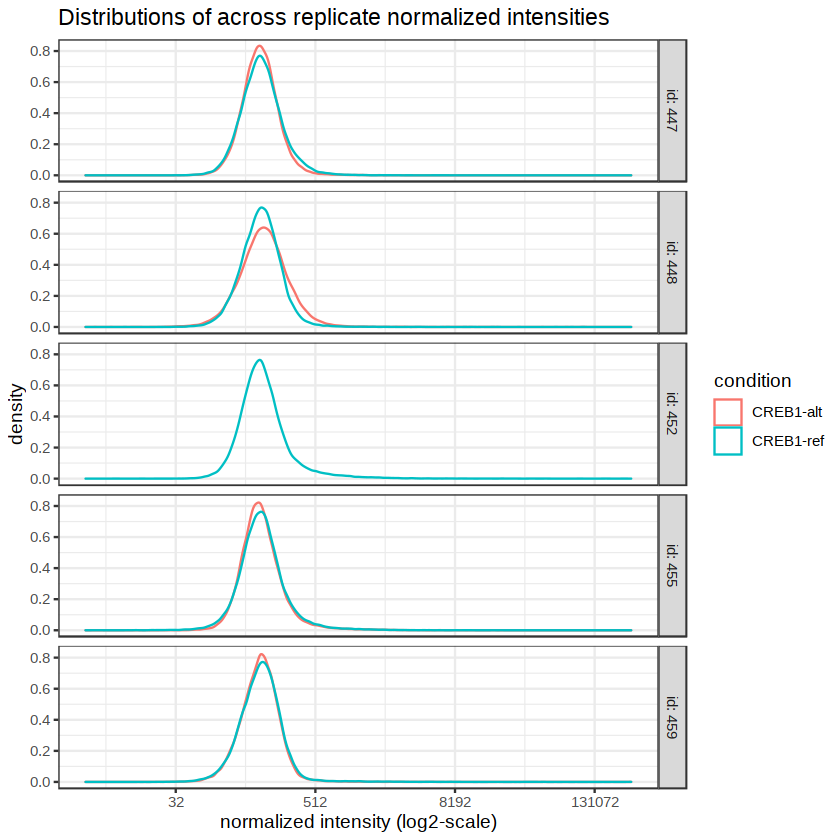

In [22]:
broom::tidy(tf_a_pmt, long = TRUE) %>%
    ggplot(aes(x = normalized, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("normalized intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of across replicate normalized intensities")

## 5. post-processing QC: check filtered probes

upbm fails if > 20% of probes filter out

In [23]:
tf_ap_df <- broom::tidy(tf_a_pmt, long = TRUE)

In [24]:
l <- length(unique(tf_ap_df$probeID))

In [25]:
tf_ap_df %>%
    dplyr::group_by(id, condition) %>%
    dplyr::summarize(nna = sum(is.na(normalized)), percent_filtered_out = 100*nna/l) %>%
    dplyr::filter(percent_filtered_out<20) %>%
    dplyr::ungroup() %>%
    print(n = 100)

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


# A tibble: 9 × 4
     id condition   nna percent_filtered_out
  <dbl> <chr>     <int>                <dbl>
1   447 CREB1-alt  3581              8.54   
2   447 CREB1-ref  3563              8.49   
3   448 CREB1-alt     6              0.0143 
4   448 CREB1-ref    11              0.0262 
5   452 CREB1-ref   506              1.21   
6   455 CREB1-alt   392              0.935  
7   455 CREB1-ref   424              1.01   
8   459 CREB1-alt    35              0.0834 
9   459 CREB1-ref     4              0.00954


## 6. 8-mer summarization

In [26]:
tf_ap8 <- summarizeKmers(pe = tf_a_pmt,
                         metrics = "median")

In [27]:
tf_ap8_df <- broom::tidy(tf_ap8, long = TRUE)

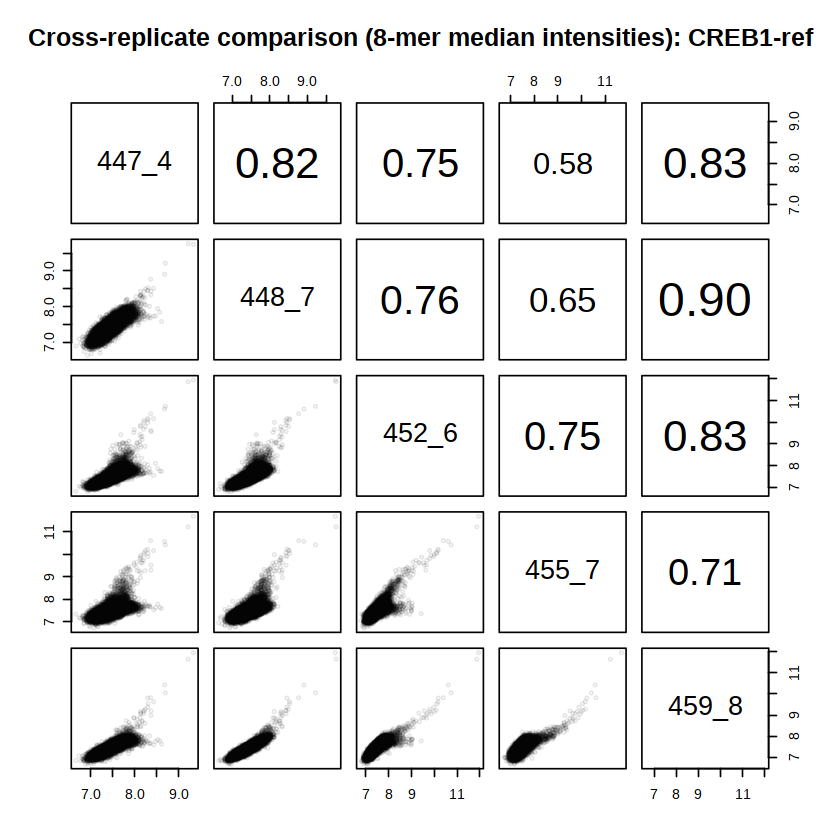

In [28]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "CREB1-ref") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): CREB1-ref")

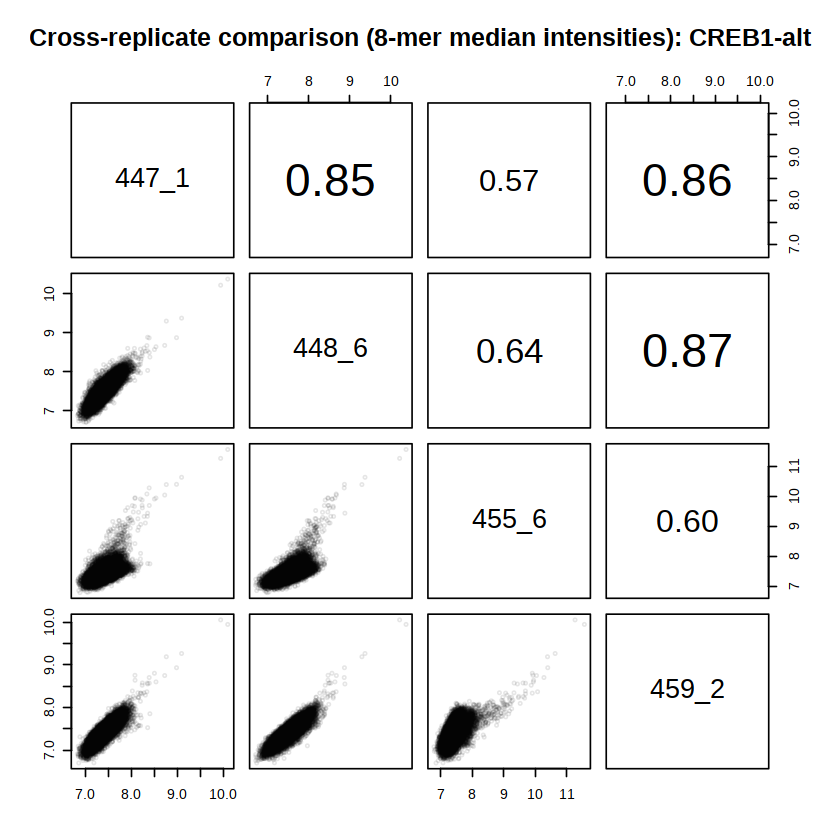

In [29]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "CREB1-alt") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): CREB1-alt")

## 7. inference: fit probe model

In [30]:
alexa_pfit <- probeFit(tf_a_pmt, stratify = "condition")
head(alexa_pfit)

class: PBMExperiment 
dim: 6 2 
metadata(0):
assays(3): beta sd df
rownames: NULL
rowData names(4): Column Row probeID Sequence
colnames(2): CREB1-alt CREB1-ref
colData names(0):
probeCols(4): Column Row probeID Sequence
probeFilter names(0): 
probeTrim: 1 36

In [31]:
pfit_dat <- broom::tidy(alexa_pfit, assay = c("beta", "sd"))
head(pfit_dat)

Column,Row,probeID,Sequence,cname,beta,sd
<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
6,1,dBr_14334_Jan07,GGTGTGAGTCCATTTCGTCAAACCAACGCAACAGGT,CREB1-alt,8.395109,0.24489258
6,1,dBr_14334_Jan07,GGTGTGAGTCCATTTCGTCAAACCAACGCAACAGGT,CREB1-ref,8.258152,0.21903859
7,1,dBr_06208_Jan07,CAGTCTAAGTTTTCGGATTACCATTAGAAATTGATG,CREB1-alt,7.646441,0.11071087
7,1,dBr_06208_Jan07,CAGTCTAAGTTTTCGGATTACCATTAGAAATTGATG,CREB1-ref,7.603067,0.09902281
8,1,dBr_39317_Jan07,CTTTTTAAAGACCTAGGAATCATTGCATTCTTATTG,CREB1-alt,7.626663,0.16054923
8,1,dBr_39317_Jan07,CTTTTTAAAGACCTAGGAATCATTGCATTCTTATTG,CREB1-ref,7.771150,0.16054923


## 8. inference: fit 8-mer model

In [32]:
alexa_kfit <- kmerFit(alexa_pfit, kmers = uniqueKmers(8L),
                      baseline = ref_condition)
alexa_kfit

class: SummarizedExperiment 
dim: 32896 2 
metadata(1): baseline
assays(5): affinityEstimate affinityVariance contrastDifference
  contrastAverage contrastVariance
rownames: NULL
rowData names(1): seq
colnames(2): CREB1-alt CREB1-ref
colData names(0):

## 9. inference: test for 8-mer affinity (for a given protein to a given 8-mer)

In [33]:
alexa_pa <- kmerTestAffinity(alexa_kfit)
alexa_pa

class: SummarizedExperiment 
dim: 32896 2 
metadata(0):
assays(6): affinityEstimate affinityVariance ... affinityP affinityQ
rownames: NULL
rowData names(1): seq
colnames(2): CREB1-alt CREB1-ref
colData names(0):

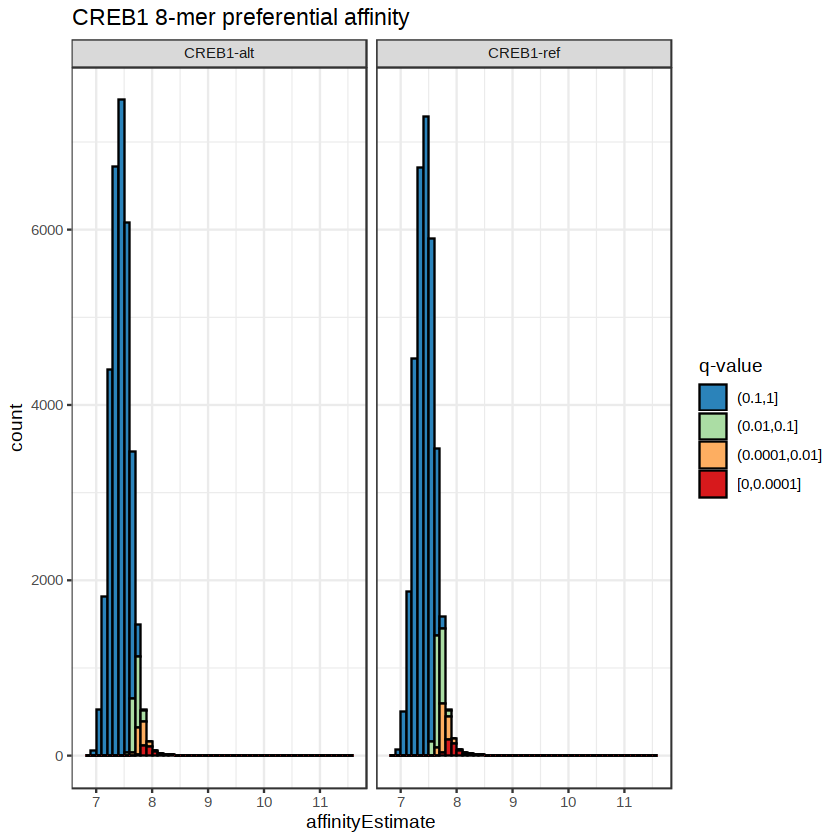

In [34]:
pa_dat <- broom::tidy(alexa_pa, c("affinityEstimate", "affinityQ"))

pa_dat %>%
    dplyr::mutate(affinityQ = cut(affinityQ, c(1e0, 1e-1, 1e-2, 1e-4, 0),
                                  include.lowest = TRUE),
                  affinityQ = factor(affinityQ, levels = rev(levels(affinityQ)))) %>%
    ggplot(aes(x = affinityEstimate, fill = affinityQ)) +
    geom_histogram(binwidth = .1, boundary = 10, color = 'black', position = "stack", alpha = 1) +
    scale_fill_brewer("q-value", palette = "Spectral", direction = -1, drop = FALSE,
                      na.value = "black") +
    theme_bw() +
    facet_wrap( ~ cname, nrow = 1) +
    ggtitle(paste(tf,"8-mer preferential affinity"))

In [35]:
kfit_dat <- broom::tidy(alexa_kfit, c("affinityEstimate", "affinityVariance", "affinityQ",
                                      "contrastDifference", "contrastAverage",
                                      "contrastVariance"))

kfit_dat$contains_motif <- grepl(motif, kfit_dat$seq)
kfit_dat$contains_rc_motif <- grepl(rc_motif, kfit_dat$seq)
kfit_dat$contains_any_motif <- ifelse(kfit_dat$contains_motif | kfit_dat$contains_rc_motif, paste(tf, "k-mer"), "*other k-mer")
kfit_dat[kfit_dat$contains_any_motif == paste(tf, "k-mer"), ]
head(kfit_dat)

seq,cname,affinityEstimate,affinityVariance,contrastDifference,contrastAverage,contrastVariance,contains_motif,contains_rc_motif,contains_any_motif
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>
AAACGTCA,CREB1-alt,8.194589,0.008091706,-0.05620929,8.222694,0.003098661,TRUE,FALSE,CREB1 k-mer
AAACGTCA,CREB1-ref,8.250799,0.009936111,NA,NA,NA,TRUE,FALSE,CREB1 k-mer
AAATGACG,CREB1-alt,8.104729,0.004204338,-0.04188766,8.125673,0.003210459,FALSE,TRUE,CREB1 k-mer
AAATGACG,CREB1-ref,8.146616,0.006405070,NA,NA,NA,FALSE,TRUE,CREB1 k-mer
AACCGTCA,CREB1-alt,7.528223,0.004414665,-0.04012709,7.548287,0.001586618,TRUE,FALSE,CREB1 k-mer
AACCGTCA,CREB1-ref,7.568350,0.003874352,NA,NA,NA,TRUE,FALSE,CREB1 k-mer
AACGTCAA,CREB1-alt,7.791130,0.004233001,-0.02953282,7.805896,0.001613684,TRUE,FALSE,CREB1 k-mer
AACGTCAA,CREB1-ref,7.820662,0.004342964,NA,NA,NA,TRUE,FALSE,CREB1 k-mer
AACGTCAC,CREB1-alt,8.387610,0.007551629,-0.12956044,8.452390,0.004449599,TRUE,FALSE,CREB1 k-mer


seq,cname,affinityEstimate,affinityVariance,contrastDifference,contrastAverage,contrastVariance,contains_motif,contains_rc_motif,contains_any_motif
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>
AAAAAAAA,CREB1-alt,7.567217,0.003561500,-0.02210184,7.578268,0.001155014,FALSE,FALSE,*other k-mer
AAAAAAAA,CREB1-ref,7.589319,0.003401199,NA,NA,NA,FALSE,FALSE,*other k-mer
AAAAAAAC,CREB1-alt,7.599648,0.002364321,0.03528768,7.582005,0.001301919,FALSE,FALSE,*other k-mer
AAAAAAAC,CREB1-ref,7.564361,0.002514338,NA,NA,NA,FALSE,FALSE,*other k-mer
AAAAAAAG,CREB1-alt,7.450269,0.003129434,0.01376392,7.443387,0.001292001,FALSE,FALSE,*other k-mer
AAAAAAAG,CREB1-ref,7.436505,0.003002533,NA,NA,NA,FALSE,FALSE,*other k-mer


## 10. inference: test for differential affinity across isoforms (for a given 8-mer)

In [36]:
alexa_da <- kmerTestContrast(alexa_kfit)
alexa_da

class: SummarizedExperiment 
dim: 32896 2 
metadata(0):
assays(6): contrastAverage contrastDifference ... contrastP contrastQ
rownames: NULL
rowData names(1): seq
colnames(2): CREB1-alt CREB1-ref
colData names(0):

In [37]:
da_dat <- broom::tidy(alexa_da, c("contrastAverage", "contrastDifference",
                                  "contrastQ"))

da_dat <- da_dat %>%
    dplyr::filter(cname != ref_condition) %>%
    dplyr::mutate(contrastQ_cut = cut(contrastQ, c(1e0, 1e-1, 1e-2, 1e-3, 0),
                                  include.lowest = TRUE),
                  contrastQ_cut = factor(contrastQ_cut, levels = rev(levels(contrastQ_cut))))

In [38]:
da_dat$contains_motif <- grepl(motif, da_dat$seq)
da_dat$contains_rc_motif <- grepl(rc_motif, da_dat$seq)
da_dat$contains_any_motif <- ifelse(da_dat$contains_motif | da_dat$contains_rc_motif, paste(tf, "k-mer"), "*other k-mer")

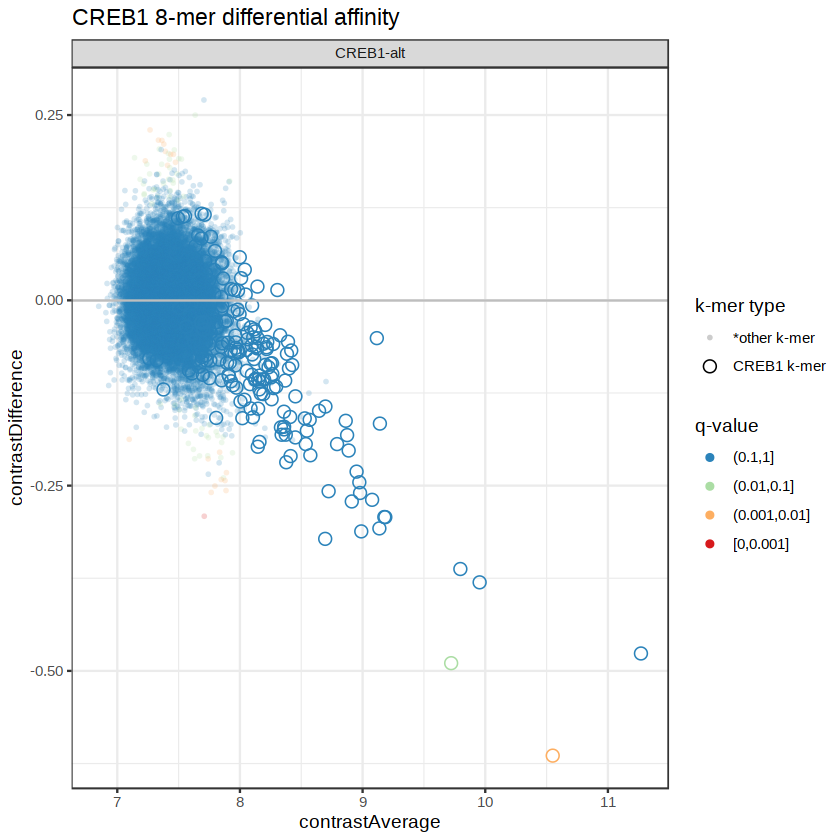

In [39]:
da_dat %>%
    ggplot(aes(x = contrastAverage, y = contrastDifference,
               color = contrastQ_cut, shape = contains_any_motif, 
               size = contains_any_motif, alpha = contains_any_motif)) +
    geom_point() +
    scale_color_brewer("q-value", palette = "Spectral", direction = -1, drop = FALSE,
                       na.value = "black") +
    scale_size_manual("k-mer type", values=c(1, 3)) +
    scale_shape_manual("k-mer type", values=c(16, 21)) +
    scale_alpha_manual("k-mer type", values=c(0.2, 1)) +
    geom_hline(color = 'gray', yintercept = 0) + 
    theme_bw() +
    guides(color = guide_legend(override.aes = list(alpha = 1))) +
    facet_grid(. ~ cname) +
    ggtitle(paste(tf, "8-mer differential affinity"))

## 11. make sequence logos

In [40]:
source("../../pbm_utils.r")

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: RSQLite

Loading required package: parallel

Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:Biostrings’:

    pattern



Attaching package: ‘seqinr’


The following object is masked from ‘package:seqLogo’:

    consensus


The following object is masked from ‘package:Biostrings’:

    translate


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:dplyr’:

    count




In [41]:
n_to_plot <- 50

In [42]:
pa_dat_sort <- pa_dat[order(pa_dat$affinityQ, decreasing = FALSE), ]

pa_ref <- head(pa_dat_sort[pa_dat_sort$cname == "CREB1-ref",], n_to_plot)
print(nrow(pa_ref))

pa_a <- head(pa_dat_sort[pa_dat_sort$cname == "CREB1-alt",], n_to_plot)
print(nrow(pa_a))

[1] 50
[1] 50


In [43]:
pa_ref_pwm <- pwm_from_ordered_list(pa_ref$seq, orientation_motif="GTCA")
pa_a_pwm <- pwm_from_ordered_list(pa_a$seq, orientation_motif="GTCA")

[1] 50

Time difference of 0.35 secs
Determining distance matrix based on shared 5-mers:

Time difference of 0.14 secs

Clustering into groups by similarity:

Time difference of 0.29 secs

Aligning Sequences:

Time difference of 0.6 secs

Iteration 1 of 2:

Determining distance matrix based on alignment:

Time difference of 0.12 secs

Reclustering into groups by similarity:

Time difference of 0.18 secs

Realigning Sequences:

Time difference of 0.65 secs

Alignment converged - skipping remaining iteration.

Refining the alignment:

Time difference of 0.09 secs

[1] 50

Time difference of 0.35 secs
Determining distance matrix based on shared 5-mers:

Time difference of 0.16 secs

Clustering into groups by similarity:

Time difference of 0.24 secs

Aligning Sequences:

Time difference of 0.57 secs

Iteration 1 of 2:

Determining distance matrix based on alignment:

Time difference of 0.15 secs

Reclustering into groups by similarity:

Time difference of 0.18 secs

Realigning Sequences:


In [44]:
pwms <- list('CREB1-ref'=pa_ref_pwm, 'CREB1-alt'=pa_a_pwm)

In [45]:
options(repr.plot.width=1.5, repr.plot.height=1, repr.plot.pointsize=9)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


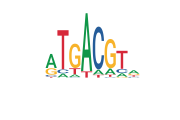

In [46]:
ggseqlogo(pwms[[1]], ncol=1) + theme(axis.text.x = element_blank(),
                                     axis.text.y = element_blank(),
                                     axis.title.y = element_blank())
ggsave("../../../figures/fig3/CREB1-ref_pbm_seqlogo.pdf", width=1.5, height=1)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


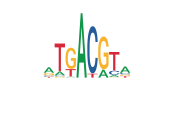

In [47]:
ggseqlogo(pwms[[2]], ncol=1) + theme(axis.text.x = element_blank(),
                                     axis.text.y = element_blank(),
                                     axis.title.y = element_blank())
ggsave("../../../figures/fig3/CREB1-alt_pbm_seqlogo.pdf", width=1.5, height=1)

## 12. write files for supplement/plotting

In [48]:
write.csv(kfit_dat, file=file.path("../../../data/processed/pbms", paste0(tf, "kfit_dat.csv")), row.names=FALSE)
write.csv(da_dat, file=file.path("../../../data/processed/pbms", paste0(tf, "da_dat.csv")), row.names=FALSE)

In [49]:
## for GEO, need affinityEstimate per protein
head(pa_dat)

seq,cname,affinityEstimate,affinityQ
<chr>,<chr>,<dbl>,<dbl>
AAAAAAAA,CREB1-alt,7.567217,0.2983408
AAAAAAAA,CREB1-ref,7.589319,0.1563355
AAAAAAAC,CREB1-alt,7.599648,0.1171125
AAAAAAAC,CREB1-ref,7.564361,0.1184472
AAAAAAAG,CREB1-alt,7.450269,0.4267970
AAAAAAAG,CREB1-ref,7.436505,0.3600049


In [50]:
geo <- pa_dat %>% reshape2::dcast(seq ~ cname, value.var = "affinityEstimate")
head(geo)

,seq,CREB1-alt,CREB1-ref
,<chr>,<dbl>,<dbl>
1,AAAAAAAA,7.567217,7.589319
2,AAAAAAAC,7.599648,7.564361
3,AAAAAAAG,7.450269,7.436505
4,AAAAAAAT,7.559363,7.548651
5,AAAAAACA,7.555335,7.499062
6,AAAAAACC,7.504597,7.531885


In [51]:
write.csv(geo, file=file.path("../../../data/processed/pbms", paste0(tf, "-geo.csv")), row.names=FALSE,
          quote=FALSE)

In [52]:
## for supp, want affinity estimates + da q-value
supp <- da_dat %>% 
    select(seq, cname, contrastAverage, contrastDifference, contrastQ)

supp <- full_join(supp, geo, by="seq") %>%
    select(seq, "CREB1-ref", "CREB1-alt", contrastAverage, contrastDifference, contrastQ)

In [53]:
write.table(supp, file="../../../supp/SuppTable_CREB1-PBM.txt", row.names=FALSE, quote=FALSE, sep="\t")